<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/FordFulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en ingeniería en computación 
##<center>Análisis y diseño de algoritmos 
##<center>Trabajo: 
##<center>Ford Fulkerson´s Algorithm 
##<center>Newtwork flow 
###<center>Catedrático: Dr. Jésus Roberto López Santillán
###<center>Estudiante: Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


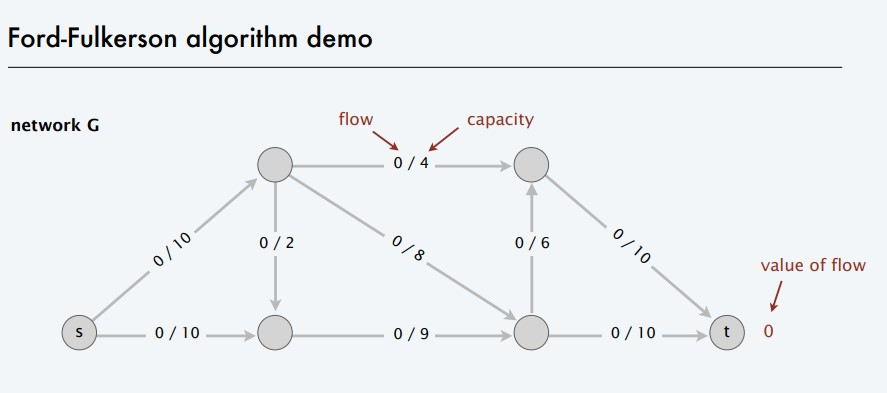

In [ ]:
#@title Initial Graph
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image 
Image("/content/drive/MyDrive/Analisis/images/flow/Captura de pantalla 2022-05-15 172133.jpg")


#Algoritmo 
Para este algoritmo se ha creado una clase "Graph"
con sus métodos "BFS" y "FordFulkerson" los cuales se encargan de encontrar un camino (path) y el de econtrar el flujo máximo respectivamente.
##Grafo de adyacencia
Se usara una matriz de adyacencia para el grafo original y la el grafo residual en el que se iran almacenando las capacidades.

Para poder poner el grafo original y el residual en una misma matriz, se pondra los valores del grafo residual en uno de los lados dividos por la diagonal principal.



In [ ]:
class Graph:

	def __init__(self, graph):
		self.graph = graph 
		self. ROW = len(graph)

	#Este método regresara True si ha encontrado un camino que lleve de Source a Sink
	def BFS(self, s, t, parent):

		# Se inicializa todos los nodos como no visitados
		visited = [False]*(self.ROW)

		#Cola para BFS
		queue = []

		#Se agraga "s" a la cola y se marca como visitado
		queue.append(s)
		visited[s] = True

		# Standard BFS Loop
		while queue:

			#se quita el primer elemento de "queue" y se almacena en "u"
			u = queue.pop(0)

			for ind, val in enumerate(self.graph[u]):

				#Si el node"ind" no ha sido viditado y se encuentra conectado con "u" 
				if visited[ind] == False and val > 0:
					queue.append(ind)
					visited[ind] = True
					parent[ind] = u
					#si se ha llegado a sink significa que se ha encontrado un camino y se regresa True 
					if ind == t:
						return True

		return False
			
	
	# Regresa el máximo flujo posible 
	def FordFulkerson(self, source, sink):

		# Aquí se guardara el "path"
		parent = [-1]*(self.ROW)

		max_flow = 0 #Se inicializa el maximos flujo en 0	

		while self.BFS(source, sink, parent) :
			path_flow = float("Inf")
			s = sink
			#Aquí se encuentra cuello de botella para el path guardado en "path"
			#como se le ha dado un valor de "inf" a path_flow tomara por default el primer edge
			# del path y déspues lo compara con los otros valores del path para obtener el mínimo
			while(s != source):
				path_flow = min (path_flow, self.graph[parent[s]][s])
				s = parent[s]

			# Se agrega el valor cuello de botella del path al "max_flow"

			max_flow += path_flow

			# Se actuliza las capacidades del grafo 
			v = sink
			while(v != source):
				u = parent[v]
				self.graph[u][v] -= path_flow
				self.graph[v][u] += path_flow
				v = parent[v]
	 
		return max_flow

def run():
		# Grafo

		graph=[[0,10,10,0,0,0],
    			[0,0,2,4,8,0],
					[0,0,0,0,9,0],
					[0,0,0,0,0,10],
					[0,0,0,6,0,10],
				[0,0,0,0,0,0]]

		g = Graph(graph)
		print(graph)
		source = 0
		sink = 5

		print (f"El máximo flujo sera :{g.FordFulkerson(source, sink)}")

if __name__=="__main__":
		run()



[[0, 10, 10, 0, 0, 0], [0, 0, 2, 4, 8, 0], [0, 0, 0, 0, 9, 0], [0, 0, 0, 0, 0, 10], [0, 0, 0, 6, 0, 10], [0, 0, 0, 0, 0, 0]]
El máximo flujo sera :19


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


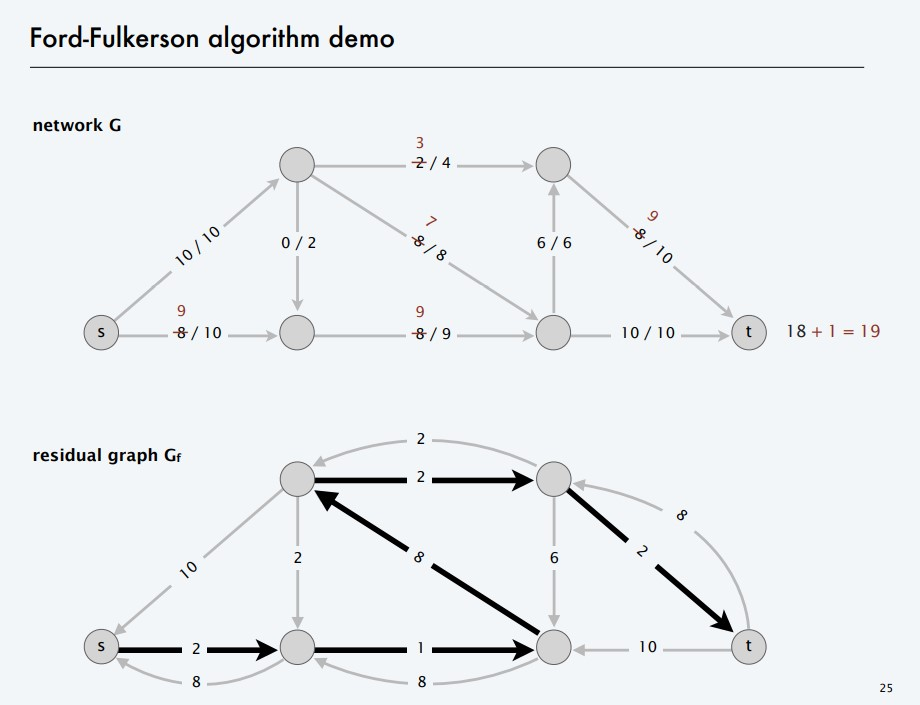

In [ ]:
#@title Graph
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image 
Image("/content/drive/MyDrive/Analisis/images/flow/residual.jpg")
